In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

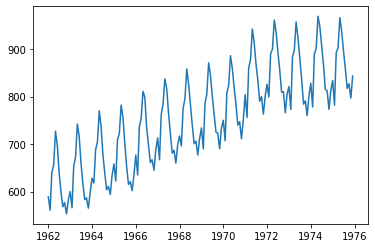

In [4]:
plt.plot(milk)

In [5]:
milk

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [6]:
import statsmodels.api as sm


In [7]:
print (sm.tsa.stattools.adfuller(milk.milk)[1])


0.6274267086030316


In [8]:
round(0.6274267086030316,2)

0.63

In [9]:
import calendar

In [10]:
days = [calendar.monthrange(i.year, i.month)[1] for i in milk.index]

In [11]:
milk['days'] = milk.milk*1.0/days

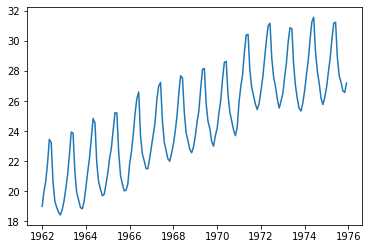

In [12]:
plt.plot(milk.days)

In [28]:
sum(milk.days)

4166.326661899464

In [23]:
milk.days_diff1 = milk.days - milk.days.shift(1)

In [24]:
sm.tsa.stattools.adfuller(milk.days_diff1.dropna())[1]

0.06430054654174293

In [25]:
milk.days_diff12 = milk.days - milk.days.shift(12)

In [26]:
sm.tsa.stattools.adfuller(milk.days_diff12.dropna())[1]

0.22127672658830383

In [29]:
milk.days_diff121 = milk.days_diff12 - milk.days_diff12.shift(1)

In [37]:
sm.tsa.stattools.adfuller(milk.days_diff121.dropna())[1]

2.2808455518036712e-06

In [40]:
milk.days_diff121 = milk.days_diff121.dropna()

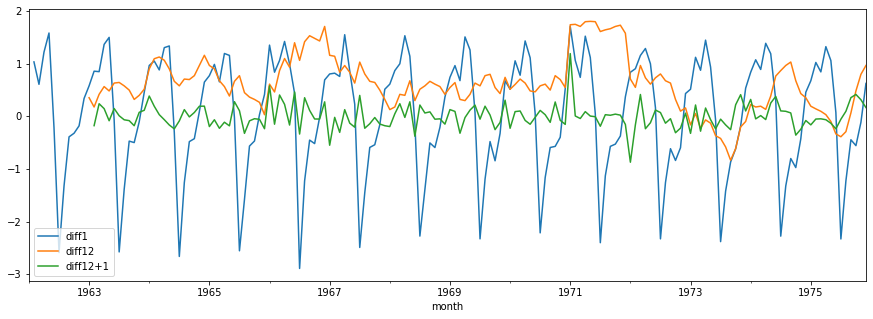

In [41]:
plt.subplots(figsize=(15, 5))
milk.days_diff1.plot(label='diff1')
milk.days_diff12.plot(label='diff12')
milk.days_diff121.plot(label='diff12+1')
plt.legend()

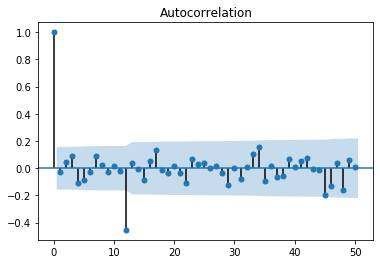

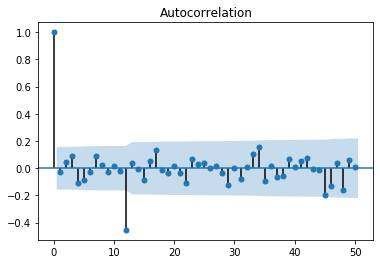

In [42]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk.days_diff121.values.squeeze(), lags=50)

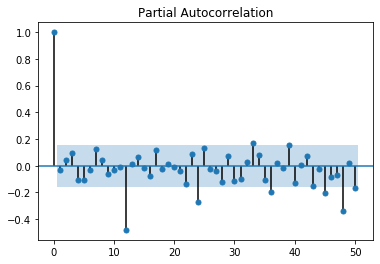

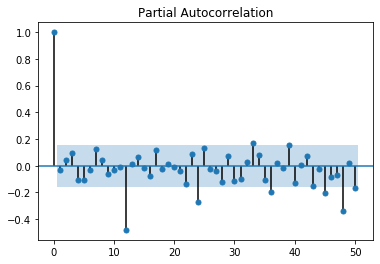

In [43]:
sm.graphics.tsa.plot_pacf(milk.days_diff121.values.squeeze(), lags=50)